In [3]:
import control
import numpy as np
import matplotlib.pyplot as plt
import kontrol


h_sc_mean = kontrol.load_transfer_function("sensor_correction_filters/h_sc_mean.pkl")
h_sc_sigma1 = kontrol.load_transfer_function("sensor_correction_filters/h_sc_sigma1.pkl")
h_sc_sigma2 = kontrol.load_transfer_function("sensor_correction_filters/h_sc_sigma2.pkl")

h_sc_prefilt = kontrol.load_transfer_function("sensor_correction_filters/prefilt.pkl")

h_sc_mean_p = h_sc_mean * h_sc_prefilt
h_sc_sigma1_p = h_sc_sigma1 * h_sc_prefilt
h_sc_sigma2_p = h_sc_sigma2 * h_sc_prefilt

h1_mean = kontrol.load_transfer_function("complementary_filters/h1_mean.pkl")
h2_mean = kontrol.load_transfer_function("complementary_filters/h2_mean.pkl")

h1_sigma1 = kontrol.load_transfer_function("complementary_filters/h1_sigma1.pkl")
h2_sigma1 = kontrol.load_transfer_function("complementary_filters/h2_sigma1.pkl")

h1_sigma2 = kontrol.load_transfer_function("complementary_filters/h1_sigma2.pkl")
h2_sigma2 = kontrol.load_transfer_function("complementary_filters/h2_sigma2.pkl")

h2_prefilt = kontrol.load_transfer_function("complementary_filters/h2_prefilt.pkl")

h2p_mean = h2_mean * h2_prefilt
h2p_sigma1 = h2_sigma1 * h2_prefilt
h2p_sigma2 = h2_sigma2 * h2_prefilt

In [4]:
seis_data = np.load("noise_spectrums/seismic_mean.npz")
sts_data = np.load("noise_spectrums/seismometer_mean.npz")
cps_data = np.load("noise_spectrums/cps.npz")
inert_data = np.load("noise_spectrums/inert_mean.npz")

f = seis_data["f"]
seis = seis_data["data"]
sts = sts_data["data"]
cps = cps_data["data"]
inert = inert_data["data"]

In [11]:
sc_list = [h_sc_mean_p, h_sc_sigma1_p, h_sc_sigma2_p]
lp_list = [h1_mean, h1_sigma1, h1_sigma2]
hp_list = [h2p_mean, h2p_sigma1, h2p_sigma2]
n_super_list = []

for sc in sc_list:
    seis_filt = abs((1-sc)(1j*2*np.pi*f)) * seis
    sts_filt = abs(sc(1j*2*np.pi*f)) * sts
    n_sc = (seis_filt**2 + sts_filt**2)**.5
    n_cps = (cps**2 + n_sc**2)**.5
    for lp, hp in zip(lp_list, hp_list):
        cps_filt = abs(lp(1j*2*np.pi*f)) * n_cps
        inert_filt = abs(hp(1j*2*np.pi*f)) * inert
        n_super = (cps_filt**2 + inert_filt**2)**.5
        n_super_list.append(n_super)

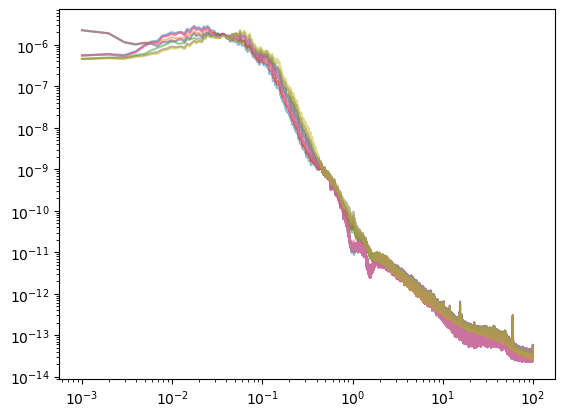

In [35]:
for n_super in n_super_list:
    plt.loglog(f, n_super, alpha=.5)

In [39]:
print(h_sc_mean.foton())

zpk([-0.009488+i*-0.026201;-0.009488+i*0.026201;-0.314225;-0.366388;-0.581935;-0.649221+i*-0.875250;-0.649221+i*0.875250;-0.690941+i*-0.892694;-0.690941+i*0.892694;-3.23142;-3.46859;-2.441958+i*-5.049870;-2.441958+i*5.049870;-2.542598+i*-5.189284;-2.542598+i*5.189284;-10.2662;-10.4901;-15.9397;-16.2144],[-0.226152;-0.128910+i*-0.195404;-0.128910+i*0.195404;-0.356073;-0.382881;-0.687256+i*-0.891557;-0.687256+i*0.891557;-0.694596+i*-0.893940;-0.694596+i*0.893940;-3.21333;-3.25002;-2.436130+i*-5.037657;-2.436130+i*5.037657;-2.448010+i*-5.062420;-2.448010+i*5.062420;-10.492507+i*-0.013886;-10.492507+i*0.013886;-15.928024+i*-0.048365;-15.928024+i*0.048365],0.831898,"s")


In [40]:
print(h_sc_sigma1.foton())

zpk([-0.016292+i*-0.023944;-0.016292+i*0.023944;-0.366388;-0.433455+i*-0.394160;-0.433455+i*0.394160;-0.179983+i*-0.977549;-0.179983+i*0.977549;-0.177677+i*-0.979446;-0.177677+i*0.979446;-3.23143;-3.96499;-2.254448+i*-5.113062;-2.254448+i*5.113062;-2.441955+i*-5.049877;-2.441955+i*5.049877;-15.7141;-15.795224+i*-0.892568;-15.795224+i*0.892568;-15.8788],[-0.128542+i*-0.284829;-0.128542+i*0.284829;-0.353188+i*-0.189339;-0.353188+i*0.189339;-0.49024;-0.179692+i*-0.977477;-0.179692+i*0.977477;-0.180269+i*-0.977645;-0.180269+i*0.977645;-3.17837;-3.28528;-2.428112+i*-5.052584;-2.428112+i*5.052584;-2.455472+i*-5.047386;-2.455472+i*5.047386;-15.586903+i*-0.162466;-15.586903+i*0.162466;-16.009535+i*-0.177842;-16.009535+i*0.177842],0.80785,"s")


In [41]:
print(h_sc_sigma2.foton())

zpk([-0.022186+i*-0.020133;-0.022186+i*0.020133;-0.36639;-0.452581+i*-0.512774;-0.452581+i*0.512774;-0.078152+i*-0.905637;-0.078152+i*0.905637;-0.078909+i*-0.909436;-0.078909+i*0.909436;-3.23143;-4.7229;-1.897492+i*-4.850835;-1.897492+i*4.850835;-2.441956+i*-5.049872;-2.441956+i*5.049872;-15.9278;-16.9332;-24.802;-26.7448],[-0.137919+i*-0.346337;-0.137919+i*0.346337;-0.392491+i*-0.262962;-0.392491+i*0.262962;-0.577193;-0.078691+i*-0.909224;-0.078691+i*0.909224;-0.079131+i*-0.909646;-0.079131+i*0.909646;-3.11777;-3.34738;-2.401761+i*-5.028812;-2.401761+i*5.028812;-2.480416+i*-5.071346;-2.480416+i*5.071346;-15.8764;-15.9817;-26.6328;-26.8544],0.813202,"s")


In [52]:
print(h_sc_prefilt.foton())

zpk([0;0;0],[-0.018849+i*0.000000;-0.018849+i*-0.000000;-0.0188498],1,"s")


In [49]:
h1_mean_ = control.tf(h1_mean.num[0][0][1:], h1_mean.den[0][0])
print(kontrol.TransferFunction(h1_mean_).foton())

08:22 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-1.350428+i*-1.755433;-1.350428+i*1.755433;-2.81667;-0.842547+i*-3.827539;-0.842547+i*3.827539;-0.079272+i*-4.227083;-0.079272+i*4.227083;-0.079231+i*-4.233029;-0.079231+i*4.233029;-6.28318;-0.279015+i*9.558953;-0.279015+i*-9.558953;-0.277913+i*-9.560928;-0.277913+i*9.560928;-13.379694+i*-17.016832;-13.379694+i*17.016832;-62.8319;-56.909755+i*-97.920721;-56.909755+i*97.920721],[-1.2614;-1.340182+i*-1.758987;-1.340182+i*1.758987;-1.361536+i*1.752347;-1.361536+i*-1.752347;-4.222500+i*-0.107823;-4.222500+i*0.107823;-0.080000+i*-4.230000;-0.080000+i*4.230000;-6.2804;-6.31967;-9.34509;-0.280001+i*-9.560000;-0.280001+i*9.560000;-9.76511;-13.380650+i*-17.015409;-13.380650+i*17.015409;-13.378694+i*-17.018447;-13.378694+i*17.018447;-18678.9],2.06444,"s")

zpk([-0.00299608;-0.00299662;-0.07633;-0.0796747;-0.054383+i*-0.089279;-0.054383+i*0.089279;-0.108392;-0.089362+i*-0.131672;-0.089362+i*0.131672;-0.181983;-0.41763;-0.707763;-0.258340+i*-0.663198;-0.258340+i*0.663198;-0.250663+i*-1.032432

In [63]:
h2_mean_ = control.tf(h2_mean.num[0][0][1:], h2_mean.den[0][0])
print(kontrol.TransferFunction(h2_mean_).foton())

08:26 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-1.25546;-1.339;-1.350787+i*-1.755717;-1.350787+i*1.755717;-1.278953+i*-1.940006;-1.278953+i*1.940006;-3.07534;-0.080000+i*-4.230000;-0.080000+i*4.230000;-4.501879+i*-2.826168;-4.501879+i*2.826168;-6.28297;-0.279968+i*-9.560027;-0.279968+i*9.560027;-11.095428+i*-3.975812;-11.095428+i*3.975812;-13.052137+i*-16.082439;-13.052137+i*16.082439;-13.600471+i*-17.874175;-13.600471+i*17.874175],[-1.2614;-1.340182+i*-1.758987;-1.340182+i*1.758987;-1.361536+i*1.752347;-1.361536+i*-1.752347;-4.222500+i*-0.107823;-4.222500+i*0.107823;-0.080000+i*-4.230000;-0.080000+i*4.230000;-6.2804;-6.31967;-9.34509;-0.280001+i*-9.560000;-0.280001+i*9.560000;-9.76511;-13.380650+i*-17.015409;-13.380650+i*17.015409;-13.378694+i*-17.018447;-13.378694+i*17.018447;-18678.9],18782.5,"s")

zpk([-0.00073978;-0.00299606;-0.0128781;-0.005801+i*-0.018529;-0.005801+i*0.018529;-0.0223176;-0.0796224;-0.0944424;-0.092202+i*-0.128530;-0.092202+i*0.128530;-0.176451;-0.486606;-0.710193;-0.257324+i*-0.666970;-0.257324+i*0.6669

In [65]:
print(h1_sigma1.foton())

08:26 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.554885+i*-2.955983;-0.554885+i*2.955983;-0.079979+i*-4.229988;-0.079979+i*4.229988;-2.563269+i*-3.466335;-2.563269+i*3.466335;-6.28318;-0.279969+i*-9.560020;-0.279969+i*9.560020;-3.063397+i*-10.606651;-3.063397+i*10.606651;-11.046552+i*9.104190;-11.046552+i*-9.104190;-12.761782+i*-8.045441;-12.761782+i*8.045441;-13.378202+i*-17.014888;-13.378202+i*17.014888;-34.926058+i*-28.351968;-34.926058+i*28.351968;-718.597],[-1.339546+i*-1.765036;-1.339546+i*1.765036;-4.230617+i*-0.010815;-4.230617+i*0.010815;-0.080000+i*-4.230000;-0.080000+i*4.230000;-6.27407;-6.29659;-9.45444;-0.280001+i*-9.559999;-0.280001+i*9.559999;-9.66429;-12.705495+i*-7.752778;-12.705495+i*7.752778;-12.770120+i*-8.357619;-12.770120+i*8.357619;-13.024098+i*-16.993876;-13.024098+i*16.993876;-13.770583+i*-17.064296;-13.770583+i*17.064296],0.000122388,"s")

zpk([-0.0149202;-0.017292+i*0.004609;-0.017292+i*-0.004609;-0.0276376;-0.079163+i*-0.002426;-0.079163+i*0.002426;-0.043697+i*-0.100821;-0.043697+i*0.100821;-0.0853

In [66]:
print(h2_sigma1.foton())

08:27 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-1.362908+i*-1.934309;-1.362908+i*1.934309;-3.14024;-0.080000+i*-4.230000;-0.080000+i*4.230000;-4.557193+i*-2.466159;-4.557193+i*2.466159;-6.28319;-0.280001+i*-9.560000;-0.280001+i*9.560000;-10.589615+i*4.356919;-10.589615+i*-4.356919;-12.951928+i*-7.700427;-12.951928+i*7.700427;-12.916656+i*-8.284952;-12.916656+i*8.284952;-13.023753+i*-16.895809;-13.023753+i*16.895809;-13.758593+i*-16.958779;-13.758593+i*16.958779],[-1.339546+i*-1.765036;-1.339546+i*1.765036;-4.230617+i*-0.010815;-4.230617+i*0.010815;-0.080000+i*-4.230000;-0.080000+i*4.230000;-6.27407;-6.29659;-9.45444;-0.280001+i*-9.559999;-0.280001+i*9.559999;-9.66429;-12.705495+i*-7.752778;-12.705495+i*7.752778;-12.770120+i*-8.357619;-12.770120+i*8.357619;-13.024098+i*-16.993876;-13.024098+i*16.993876;-13.770583+i*-17.064296;-13.770583+i*17.064296],0.999878,"s")

zpk([0.008650+i*0.019144;0.008650+i*-0.019144;-0.025815+i*0.038282;-0.025815+i*-0.038282;-0.0795559;-0.086925+i*0.120577;-0.086925+i*-0.120577;-0.174388;-0.50289;-0.1

In [83]:
print(kontrol.TransferFunction(h1_sigma2.minreal()).foton())

08:33 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-0.640431;-0.555786+i*0.536508;-0.555786+i*-0.536508;-0.253912+i*-1.008951;-0.253912+i*1.008951;-1.339384+i*-1.752413;-1.339384+i*1.752413;-2.81772;0.159737+i*-3.076530;0.159737+i*3.076530;-1.739161+i*-4.660493;-1.739161+i*4.660493;-6.28315;-3.079894+i*-9.339373;-3.079894+i*9.339373;-13.379803+i*-17.016773;-13.379803+i*17.016773;-13.671755+i*-27.372257;-13.671755+i*27.372257;-32.4829],[-0.275813+i*-0.650477;-0.275813+i*0.650477;-0.675897+i*-0.806474;-0.675897+i*0.806474;-1.17735;-1.254630+i*-1.832157;-1.254630+i*1.832157;-1.493498+i*-1.692551;-1.493498+i*1.692551;-3.8764;-4.75926;-5.60593;-6.217293+i*-0.171455;-6.217293+i*0.171455;-9.601043+i*-0.370799;-9.601043+i*0.370799;-13.375684+i*-17.016838;-13.375684+i*17.016838;-13.383494+i*-17.016653;-13.383494+i*17.016653],0.0763607,"s")

zpk([-0.017651+i*0.001089;-0.017651+i*-0.001089;-0.020093+i*0.001189;-0.020093+i*-0.001189;-0.004417+i*0.022599;-0.004417+i*-0.022599;-0.0719012;-0.0795767;-0.048468+i*0.127556;-0.048468+i*-0.127556;-0.

In [84]:
print(h2_sigma2.foton())

08:34 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-1.350787+i*-1.755717;-1.350787+i*1.755717;-1.112381+i*-2.272064;-1.112381+i*2.272064;-2.85562;-0.080000+i*-4.230000;-0.080000+i*4.230000;-3.612439+i*-3.474510;-3.612439+i*3.474510;-6.28319;-0.280001+i*-9.560000;-0.280001+i*9.560000;-8.348782+i*5.350613;-8.348782+i*-5.350613;-14.2891;-13.379678+i*-17.016841;-13.379678+i*17.016841;-13.473854+i*-17.064630;-13.473854+i*17.064630],[-1.17735;-1.254630+i*-1.832157;-1.254630+i*1.832157;-1.493498+i*1.692551;-1.493498+i*-1.692551;-3.8764;-0.080000+i*4.230000;-0.080000+i*-4.230000;-4.75926;-5.60593;-6.217293+i*0.171456;-6.217293+i*-0.171456;-0.280001+i*-9.560000;-0.280001+i*9.560000;-9.601043+i*0.370799;-9.601043+i*-0.370799;-13.375684+i*-17.016838;-13.375684+i*17.016838;-13.383495+i*-17.016653;-13.383495+i*17.016653],1,"s")

zpk([-0.00811244;-0.003495+i*0.019269;-0.003495+i*-0.019269;-0.0222836;-0.004417+i*-0.022598;-0.004417+i*0.022598;-0.006691+i*-0.027198;-0.006691+i*0.027198;-0.079575;-0.058274+i*0.156194;-0.058274+i*-0.156194;-0.17757

In [85]:
print(h2_prefilt.foton())

zpk([0;0;0;0],[-0.0188456;-0.018850+i*0.000004;-0.018850+i*-0.000004;-0.0188535],1,"s")


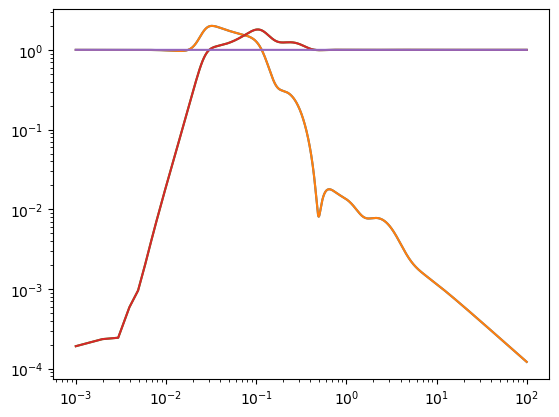

In [82]:
plt.loglog(f, abs(h1_sigma2.minreal()(1j*2*np.pi*f)))
plt.loglog(f, abs(h1_sigma2(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_sigma2.minreal()(1j*2*np.pi*f)))
plt.loglog(f, abs(h2_sigma2(1j*2*np.pi*f)))
plt.loglog(f, abs((h2_sigma2*h2_prefilt + h1_sigma2.minreal())(1j*2*np.pi*f)))